In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default parameters
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rc('legend', fontsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = True

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size':15})

In [4]:
plabels =["$M_{*}$", "$\\alpha$", "$\\beta$"," $\\gamma$", "$\\sigma$", "$\\nu$"]

In [5]:
sigma_permutations = [0.0, 0.2, 0.4, 0.6]

### first the s0 permutations

In [6]:
fixed = [False, True, False, False, True, False]

sigma1_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/sigma_permutations/mock_0/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma2_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/sigma_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma3_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/sigma_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma4_s0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/sigma_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

datas_0 = [sigma1_s0.clean[:,1], sigma2_s0.clean[:,1],  sigma3_s0.clean[:,1], sigma4_s0.clean[:,1]]

### now the s15 permutations

In [7]:
fixed = [False, True, False, False, True, False]

sigma1_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/sigma_permutations/mock_0/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma2_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/sigma_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=30)

sigma3_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/sigma_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=30)

sigma4_s15 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/sigma_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

datas_15 = [sigma1_s15.clean[:,1], sigma2_s15.clean[:,1],  sigma3_s15.clean[:,1], sigma4_s15.clean[:,1]]

### now the s30 permutations

In [8]:
fixed = [False, True, False, False, True, False]

sigma1_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/sigma_permutations/mock_0/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma2_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/sigma_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma3_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/sigma_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

sigma4_s30 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s30/sigma_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

datas_30 = [sigma1_s30.clean[:,1], sigma2_s30.clean[:,1],  sigma3_s30.clean[:,1], sigma4_s30.clean[:,1]]

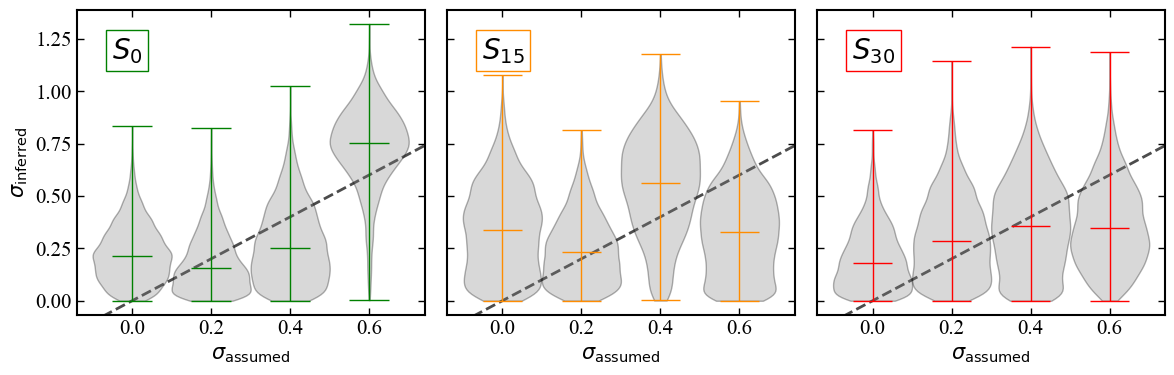

In [9]:
fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12,4))

violins_s0 = axs[0].violinplot(datas_0, showmeans=False, showmedians=True, positions=sigma_permutations, widths=0.2, showextrema=True)
violins_s15 = axs[1].violinplot(datas_15, showmeans=False, showmedians=True, positions=sigma_permutations, widths=0.2, showextrema=True)
violins_s30 = axs[2].violinplot(datas_30, showmeans=False, showmedians=True, positions=sigma_permutations, widths=0.2, showextrema=True)

for violin in [violins_s0, violins_s15, violins_s30]:
    for pc in violin['bodies']:
        pc.set_facecolor('grey')
        pc.set_edgecolor('black')

for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violins_s0[partname]
    vp.set_edgecolor("green")
    vp.set_linewidth(1)

for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violins_s15[partname]
    vp.set_edgecolor("darkorange")
    vp.set_linewidth(1)

for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violins_s30[partname]
    vp.set_edgecolor("red")
    vp.set_linewidth(1)


# violins_s0['cmedians'].set_color("green")
# violins_s15['cmedians'].set_color("darkorange")
# violins_s30['cmedians'].set_color("red")

axs[0].set_xticks(sigma_permutations, ["0.0", "0.2", "0.4", "0.6"])

xpoints = ypoints = axs[0].get_xlim()
axs[0].plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.7, lw=2)
axs[1].plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.7, lw=2)
axs[2].plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.7, lw=2)

axs[0].set_ylabel('$\\sigma_{\mathrm{inferred}}$', fontsize=15)
axs[0].set_xlabel("$\\sigma_{\mathrm{assumed}}$", fontsize=15)
axs[1].set_xlabel("$\\sigma_{\mathrm{assumed}}$", fontsize=15)
axs[2].set_xlabel("$\\sigma_{\mathrm{assumed}}$", fontsize=15)

axs[0].text(0.1, 0.84, "$S_0$", transform=axs[0].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
axs[1].text(0.1, 0.84, "$S_{15}$", transform=axs[1].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
axs[2].text(0.1, 0.84, "$S_{30}$", transform=axs[2].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="red"))

plt.tight_layout()
plt.savefig("../../../paper_1/figures/feature_recovery/sigma_permuations.pdf", bbox_inches="tight")
plt.show()

In [10]:
# fig, axs = plt.subplots(ncols=3, nrows=2, sharex=True, sharey="row", figsize=(12,8))

# violins_s0 = axs[0, 0].violinplot(datas_0, showmeans=False, showmedians=True, positions=alpha_permutations, widths=0.48, showextrema=True, vert=False)
# violins_s15 = axs[0, 1].violinplot(datas_15, showmeans=False, showmedians=True, positions=alpha_permutations, widths=0.48, showextrema=True, vert=False)
# violins_s30 = axs[0, 2].violinplot(datas_30, showmeans=False, showmedians=True, positions=alpha_permutations, widths=0.48, showextrema=True, vert=False)

# for violin in [violins_s0, violins_s15, violins_s30]:
#     for pc in violin['bodies']:
#         pc.set_facecolor('grey')
#         pc.set_edgecolor('black')

# for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
#     vp = violins_s0[partname]
#     vp.set_edgecolor("green")
#     vp.set_linewidth(1)

# for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
#     vp = violins_s15[partname]
#     vp.set_edgecolor("darkorange")
#     vp.set_linewidth(1)

# for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
#     vp = violins_s30[partname]
#     vp.set_edgecolor("red")
#     vp.set_linewidth(1)


# axs[0, 0].set_yticks(alpha_permutations, ["1.5", "2.0", "2.5", "3.0"])

# xpoints = ypoints = axs[0, 0].get_xlim()
# axs[0, 0].plot(xpoints, ypoints, linestyle=':', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.7)
# axs[0, 1].plot(xpoints, ypoints, linestyle=':', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.7)
# axs[0, 2].plot(xpoints, ypoints, linestyle=':', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.7)

# axs[0, 0].set_ylabel('$\mathrm{assumed}\ \\alpha$', fontsize=15)


# # Plot for alpha 0
# sns.set_style("white", {'axs.grid': False})
# sns.kdeplot(x=alpha1_s0.clean[:,0], y=alpha1_s0.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 0], color="green")
# sns.kdeplot(x=alpha2_s0.clean[:,0], y=alpha2_s0.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 0], color="green")
# sns.kdeplot(x=alpha3_s0.clean[:,0], y=alpha3_s0.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 0], color="green")
# sns.kdeplot(x=alpha4_s0.clean[:,0], y=alpha4_s0.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 0], color="green")
# axs[1, 0].set_xlim(1.3, 4.0)
# axs[1, 0].set_ylim(0, 2.1)

# # Plot for alpha 15
# sns.kdeplot(x=alpha1_s15.clean[:,0], y=alpha1_s15.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 1], color="darkorange")
# sns.kdeplot(x=alpha2_s15.clean[:,0], y=alpha2_s15.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 1], color="darkorange")
# sns.kdeplot(x=alpha3_s15.clean[:,0], y=alpha3_s15.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 1], color="darkorange")
# sns.kdeplot(x=alpha4_s15.clean[:,0], y=alpha4_s15.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 1], color="darkorange")
# axs[1, 1].set_xlim(1.3, 4.0)
# axs[1, 1].set_ylim(0, 2.1)

# # Plot for alpha 30
# sns.kdeplot(x=alpha1_s30.clean[:,0], y=alpha1_s30.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 2], color="red")
# sns.kdeplot(x=alpha2_s30.clean[:,0], y=alpha2_s30.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 2], color="red")
# sns.kdeplot(x=alpha3_s30.clean[:,0], y=alpha3_s30.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 2], color="red")
# sns.kdeplot(x=alpha4_s30.clean[:,0], y=alpha4_s30.clean[:,1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=1.5, ax=axs[1, 2], color="red")
# axs[1, 2].set_xlim(1.3, 4.0)
# axs[1, 2].set_ylim(0, 2.1)

# axs[1, 0].set_ylabel('$\mathrm{inferred}\ \\sigma_0$', fontsize=15)

# axs[1, 0].set_xlabel("$\mathrm{inferred}\ \\alpha$", fontsize=15)
# axs[1, 1].set_xlabel("$\mathrm{inferred}\ \\alpha$", fontsize=15)
# axs[1, 2].set_xlabel("$\mathrm{inferred}\ \\alpha$", fontsize=15)

# plt.tight_layout()
# plt.savefig("../../../paper_1/figures/feature_recovery/posterior_plot_example.pdf", bbox_inches="tight")
# plt.show()
